# **Exploratory Data Analysis on Online Course Enrollment Data**


We always need to take a look at data first since it is the essence of any machine learning system. We need to explore what kind of data we will need and what such data would look like.


## Objectives


*   Identify keywords in course titles using a WordCloud
*   Calculate the summary statistics and visualizations of the online course content dataset
*   Determine popular course genres
*   Calculate the summary statistics and create visualizations of the online course enrollment dataset
*   Identify courses with the greatest number of enrolled students


***


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [4]:
# set a random state
rs = 123

### Load and explore the dataset


In [6]:
course_df = pd.read_csv('data/course_genre.csv')
ratings_df = pd.read_csv('data/ratings.csv')

We will start by exploring the course genre dataset. 


In [7]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [8]:
course_df.shape[0]

307

Then we can take a quick look at its header rows


In [9]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [10]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

### Plot a Word Cloud from Course Titles


In [12]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [13]:
len(titles)

13162

In [14]:
titles[:1000]

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

We also want to filter common stop words and some less meaningful words:


In [15]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Plot  `WordCloud` 


In [16]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [17]:
wordcloud.generate(titles)

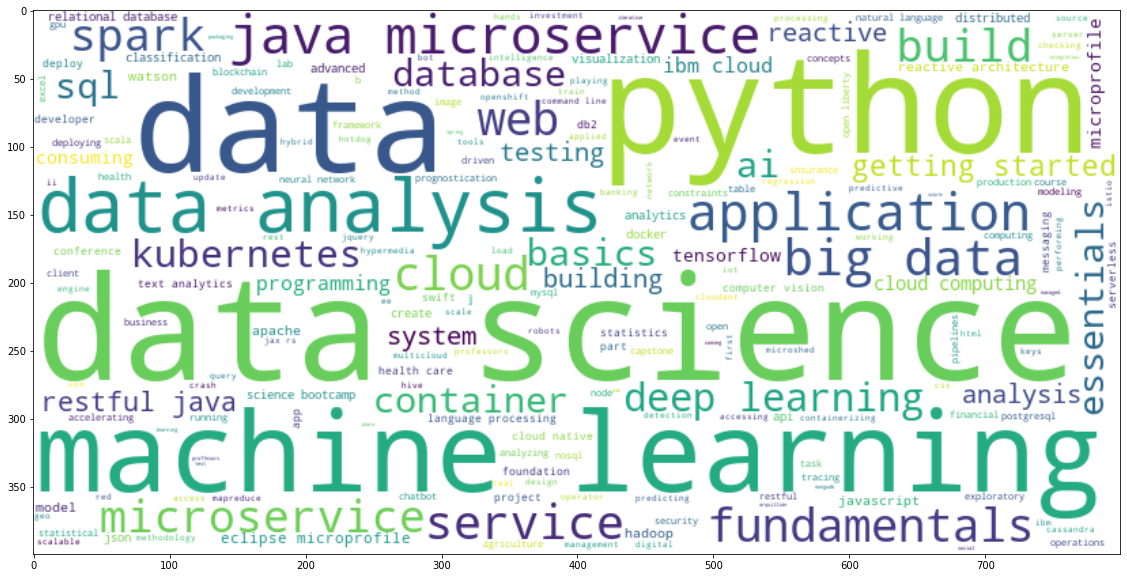

In [18]:
#plt.axis("off")
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [21]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

#### genreate a sorted course count per genre.


In [22]:
course_genres = course_df.iloc[:,2:].sum(axis=0).sort_values(ascending=False)
course_genres

BackendDev         78
MachineLearning    69
Database           60
DataAnalysis       56
DataScience        38
CloudComputing     37
BigData            36
Python             28
FrontendDev        19
Containers         17
R                  17
ComputerVision     10
Chatbot             4
Blockchain          4
dtype: int64

In [23]:
course_genres.index

Index(['BackendDev', 'MachineLearning', 'Database', 'DataAnalysis',
       'DataScience', 'CloudComputing', 'BigData', 'Python', 'FrontendDev',
       'Containers', 'R', 'ComputerVision', 'Chatbot', 'Blockchain'],
      dtype='object')

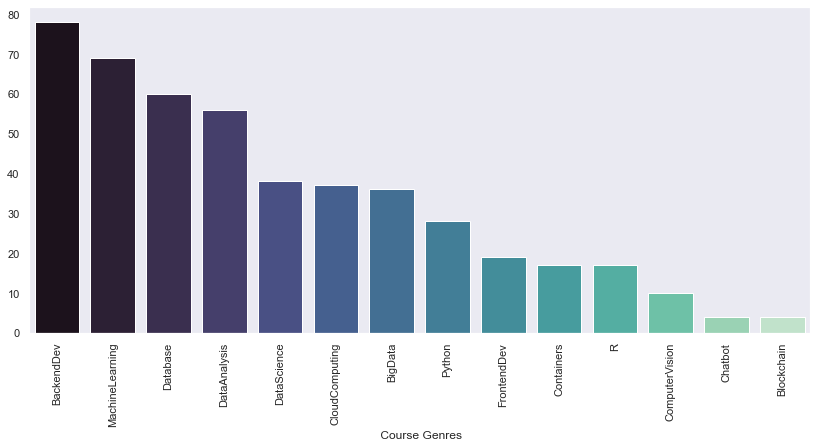

In [24]:
plt.figure(figsize=(14, 6))
sns.set_theme(style='dark', context='notebook')
sns.barplot(x = course_genres.index, y = course_genres.values, palette='mako')
plt.xticks(rotation=90)
plt.xlabel(' Course Genres')
plt.show()


### Analyze Course Enrollments


In [29]:
ratings_df

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0
...,...,...,...
233301,1540125,DS0101EN,3.0
233302,1250651,PY0101EN,3.0
233303,1003832,CB0105ENv1,3.0
233304,922065,BD0141EN,3.0


This dataset contains three columns, `user` representing a unique user id, `item` representing a course id, and `rating` representing a course enrollment mode.


In [26]:
ratings_df['rating'].unique()

array([3., 2.])

In [27]:
ratings_df.shape[0]

233306

##### aggregate the rating count for each user 


In [28]:
users_rating = (ratings_df.groupby('user').size().
                           sort_values(ascending=False).to_frame()
                           .rename(columns={0:'rating_count'}))
users_rating


,rating_count
user,
2,61
5,59
924030,51
1653994,51
1761291,50
...,...
891557,1
892174,1
892298,1


In [39]:
users_rating['rating_count'].describe().to_frame().T


,count,mean,std,min,25%,50%,75%,max
rating_count,33901.0,6.88198,5.823548,1.0,2.0,6.0,9.0,61.0


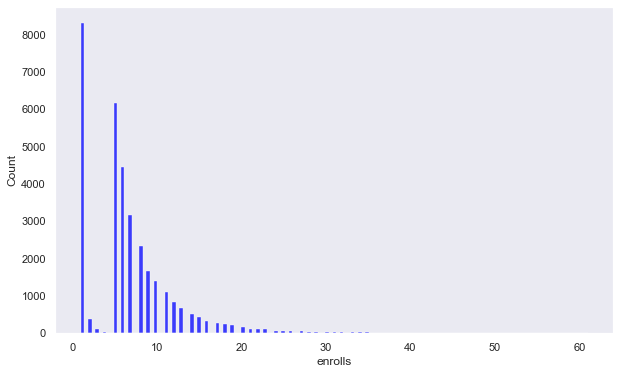

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(users_rating['rating_count'], color='blue')
plt.xlabel('enrolls');

#### Find the Top-20 Most Popular Courses


In [77]:
course_rate = (ratings_df.groupby('item').size()
                            .sort_values(ascending=False).to_frame()
                            .rename(columns={0:'rate_count'}).reset_index())
course_rate

,item,rate_count
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
...,...,...
121,ST0201EN,1
122,ST0301EN,1
123,DX0106EN,1
124,DX0108EN,1


In [78]:
course_rate = (course_df.iloc[:, :2].merge(course_rate, how='inner',
                                    left_on='COURSE_ID', right_on='item')
                                    .drop('COURSE_ID', axis=1).sort_values(by='rate_count', ascending=False))
course_rate.head(20)

,TITLE,item,rate_count
113,python for data science,PY0101EN,14936
106,introduction to data science,DS0101EN,14477
94,big data 101,BD0101EN,13291
109,hadoop 101,BD0111EN,10599
104,data analysis with python,DA0101EN,8303
86,data science methodology,DS0103EN,7719
103,machine learning with python,ML0101ENv3,7644
62,spark fundamentals i,BD0211EN,7551
85,data science hands on with open source tools,DS0105EN,7199
53,blockchain essentials,BC0101EN,6719


It seems that those popular courses take a huge amount of total ratings. 
Finding the exact percentage :


In [75]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

In [84]:
top = course_rate['rate_count'][:20].sum()

In [85]:
print(f"Percentage of the top course enrollments {round((top * 100)/total, 2)}%")

Percentage of the top course enrollments 63.3%
